In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# Sample Data Genrration: n number of items in DataFrame
n=500

# Generate Column 1: Category - with 8 different categories
arr_category = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']
data_category = np.random.choice(arr_category, size=n)

# Generate Column 2: Likes - with 0 to 10000 likes
data_likes=np.random.randint(0, 10000, size=n)

# Generate Column 3: Dates - with randow dates in a given date range
def random_dates(start, end, n, freq, seed=None):
    if seed is not None:
        np.random.seed(seed)
    dr = pd.date_range(start, end, freq=freq)
    return pd.to_datetime(np.random.choice(dr, n, replace=False)).date
data_dates = random_dates('2021-01-01', '2023-01-01', n, 'H')

In [8]:
# Generate DataFrame: add all 3 columns
df = pd.DataFrame({'Category' : data_category,
                   'Likes' : data_likes,
                   'Dates' : data_dates})

# Save DataFrame to file
df.to_csv('./data_files/generated_marketing_tweets.csv', index=False)

# CLEAN Data: Remove Null, Duplicates; Convert datatype of 'Likes' column
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)
df.astype({'Likes': 'int32'}).dtypes 
df

,Category,Likes,Dates
0,Fashion,9099,2021-06-14
1,Family,4580,2022-09-07
2,Culture,9298,2021-07-05
3,Food,1872,2021-06-22
4,Health,3134,2021-11-21
...,...,...,...
495,Family,8381,2021-05-24
496,Fitness,6021,2022-05-31
497,Music,7249,2022-05-24
498,Fitness,3957,2022-04-27


<Axes: xlabel='Count', ylabel='Likes'>

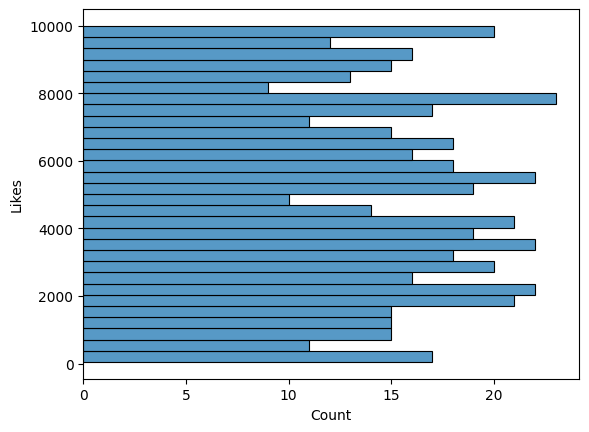

In [26]:
# VISUALIZE Data: using histplot
sns.histplot(data=df, y="Likes",bins=30)

<Axes: xlabel='Category', ylabel='Likes'>

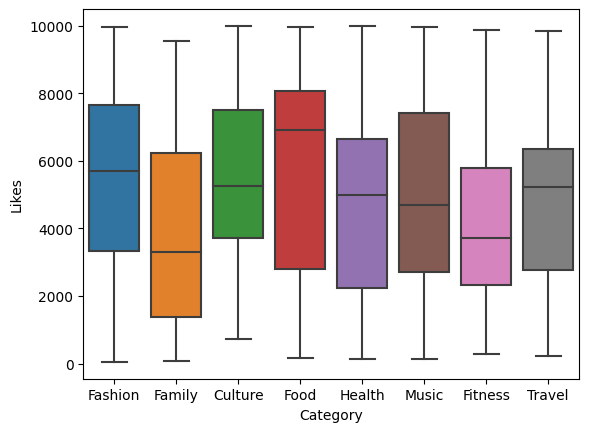

In [21]:
# VISUALIZE Data: using boxplot
sns.boxplot(data=df, x="Category", y="Likes")

In [30]:
# ANALYZE Data: Describe DataFrame & check details
df.describe()

,Likes
count,500.000000
mean,4920.902000
std,2800.992721
min,49.000000
25%,2570.500000
50%,4743.000000
75%,7338.250000
max,9988.000000


In [43]:
# PREDICT OUTPUT: Groupby 'Category' column and display meanvalues of 'Likes' column
df.groupby('Category')['Likes'].mean()

Category
Culture    5335.931034
Family     3920.434783
Fashion    5426.587302
Fitness    4103.754386
Food       5954.360656
Health     4782.108434
Music      5036.310345
Travel     4949.627451
Name: Likes, dtype: float64